In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [9]:
data = pd.read_csv('streamlit_data_anonymous.csv', low_memory=False)

In [13]:
# Combine the number of internship and major columns together 
data['Major'] = pd.concat([data['Primary Major'], data['Recipient Primary Majors_fds_2021'], data['Recipient Primary Major_fds_2022'], data['Q5.4_fds_2024']], ignore_index=True)
data['num_internships'] = pd.concat([data['Number of Internships'], data['Q10.1_fds_2024'], data['How many internships (summer and/or academic year) did you have while attending the University of Virginia?_fds_2021'], data['If you participated in internships, how many internships did you have while attending the University of Virginia?_fds_2022']], ignore_index=True)

In [58]:
counts= data.groupby('Major')['num_internships'].value_counts().unstack(fill_value=0)

# Compute row-wise percentages
row_percents = (counts.div(counts.sum(axis=1), axis=0) * 100)
total_students = counts.sum(axis=1).rename('Total Students')


# Append '_percent' to column names
row_percents.columns = [f"{col} (%)" for col in row_percents.columns]

# Combine counts and percentages
result = pd.concat([total_students, counts], axis=1)
result = pd.concat([result, row_percents], axis=1)
result.columns.name = 'Num Internships'
result.index.name = 'Major'


# User Specified Filters on the Data
Threshold = 64 # minimum number of students in major to show
sorting_column = '0 (%)' # column to filter by 
result = result[result['Total Students']>=Threshold].sort_values(by=sorting_column, ascending=False) # Show Highest First
result.round(1)

Num Internships,Total Students,0,1,2,3+,0 (%),1 (%),2 (%),3+ (%)
Major,,,,,,,,,
Psychology,93,49,23,14,7,52.7,24.7,15.1,7.5
Biology,113,57,33,18,5,50.4,29.2,15.9,4.4
Engineering - Biomedical Engineering,106,29,46,20,11,27.4,43.4,18.9,10.4
Engineering - Systems Engineering,74,17,21,23,13,23.0,28.4,31.1,17.6
Global Studies - Interdisciplinary,90,16,21,28,25,17.8,23.3,31.1,27.8
Statistics,70,12,24,21,13,17.1,34.3,30.0,18.6
Architecture,66,11,21,20,14,16.7,31.8,30.3,21.2
Engineering - Computer Science,208,32,69,61,46,15.4,33.2,29.3,22.1
Computer Science - Interdisciplinary,132,20,31,54,27,15.2,23.5,40.9,20.5


In [59]:

# Save counts and percent df's
result_percent=result.iloc[:, 5:]
result = result.iloc[:, 1:5]


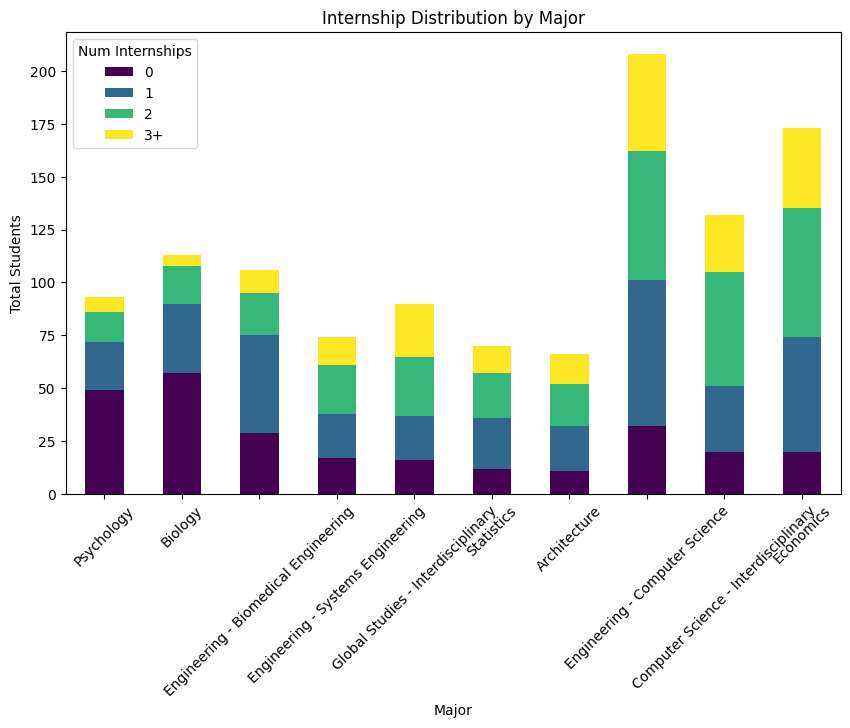

In [60]:

# Plot stacked bar chart
result.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")

plt.ylabel("Total Students")
plt.title("Internship Distribution by Major")
plt.legend(title="Num Internships")
plt.xticks(rotation=45)
plt.show()

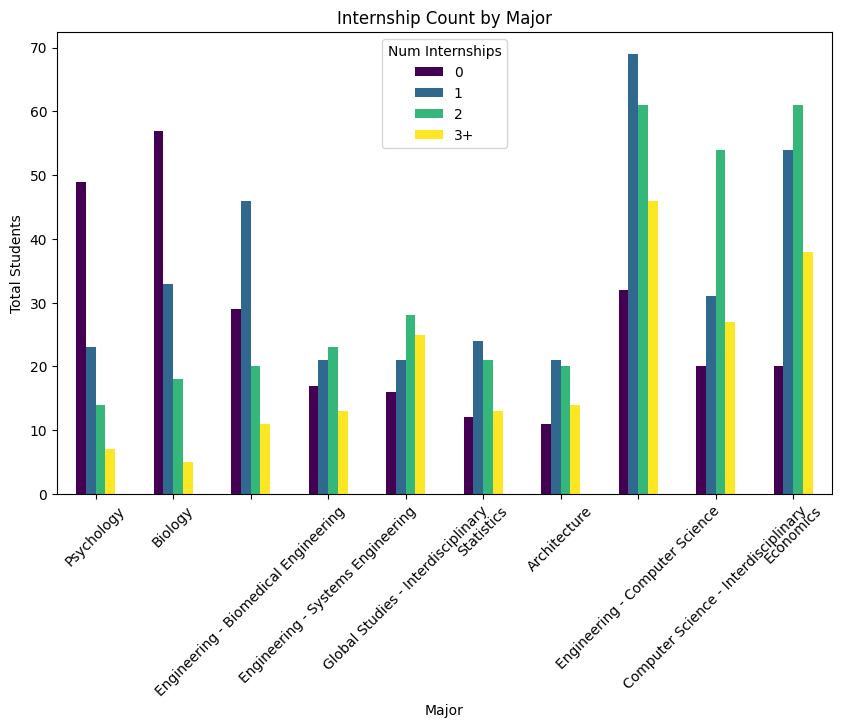

In [61]:

result.plot(kind="bar", figsize=(10,6), colormap="viridis")

plt.ylabel("Total Students")
plt.title("Internship Count by Major")
plt.legend(title="Num Internships")
plt.xticks(rotation=45)
plt.show()

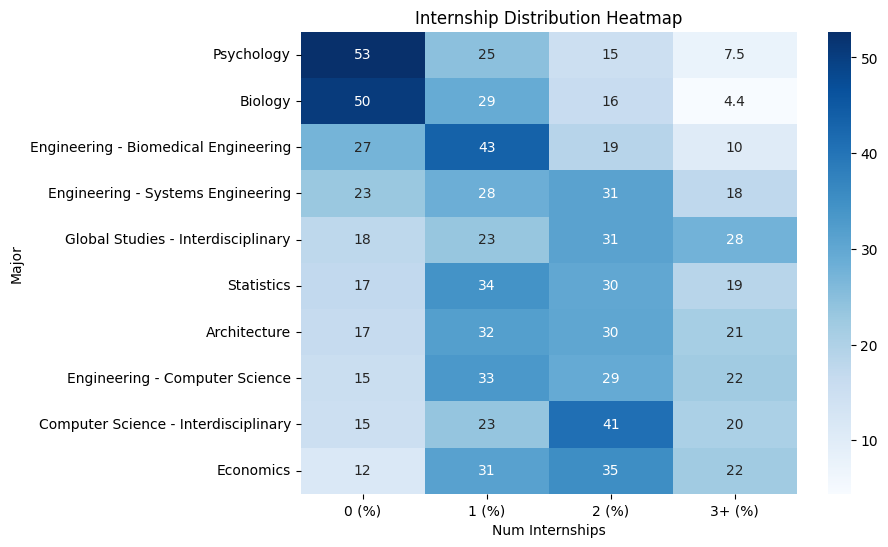

In [63]:
plt.figure(figsize=(8,6))
sns.heatmap(result_percent, annot=True, cmap="Blues")

plt.title("Internship Distribution Heatmap")
plt.ylabel("Major")
plt.xlabel("Num Internships")
plt.show()